In [1]:
from tensorflow import keras 
print('Tensorflow/Keras: %s' % keras.__version__)   

Tensorflow/Keras: 2.4.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, recall_score,accuracy_score
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, SimpleRNN

In [4]:
data=pd.read_csv('heart.csv')

In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data['Sex']=data['Sex'].replace('M',0)
data['Sex']=data['Sex'].replace('F',1)

In [8]:
data['ChestPainType']=data['ChestPainType'].replace('ATA',1)
data['ChestPainType']=data['ChestPainType'].replace('TA',2)
data['ChestPainType']=data['ChestPainType'].replace('ASY',3)
data['ChestPainType']=data['ChestPainType'].replace('NAP',4)
data['ChestPainType'].unique()

array([1, 4, 3, 2])

In [9]:
data['RestingECG']=data['RestingECG'].replace('Normal',1)
data['RestingECG']=data['RestingECG'].replace('ST',2)
data['RestingECG']=data['RestingECG'].replace('LVH',3)
data['RestingECG'].unique()

array([1, 2, 3])

In [10]:
data['ExerciseAngina']=data['ExerciseAngina'].replace('N',0)
data['ExerciseAngina']=data['ExerciseAngina'].replace('Y',1)
data['ExerciseAngina'].unique()

array([0, 1])

In [11]:
data['ST_Slope']=data['ST_Slope'].replace('Up',1)
data['ST_Slope']=data['ST_Slope'].replace('Flat',2)
data['ST_Slope']=data['ST_Slope'].replace('Down',3)
data['ST_Slope'].unique()

array([1, 2, 3])

In [12]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,1,0
1,49,1,4,160,180,0,1,156,0,1.0,2,1
2,37,0,1,130,283,0,2,98,0,0.0,1,0
3,48,1,3,138,214,0,1,108,1,1.5,2,1
4,54,0,4,150,195,0,1,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,1,132,0,1.2,2,1
914,68,0,3,144,193,1,1,141,0,3.4,2,1
915,57,0,3,130,131,0,1,115,1,1.2,2,1
916,57,1,1,130,236,0,3,174,0,0.0,2,1


In [13]:
y=data['HeartDisease']
X=data.iloc[:,0:11]
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,1,172,0,0.0,1
1,49,1,4,160,180,0,1,156,0,1.0,2
2,37,0,1,130,283,0,2,98,0,0.0,1
3,48,1,3,138,214,0,1,108,1,1.5,2
4,54,0,4,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,1,132,0,1.2,2
914,68,0,3,144,193,1,1,141,0,3.4,2
915,57,0,3,130,131,0,1,115,1,1.2,2
916,57,1,1,130,236,0,3,174,0,0.0,2


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### The Gaussian Naive Bytes Classifier

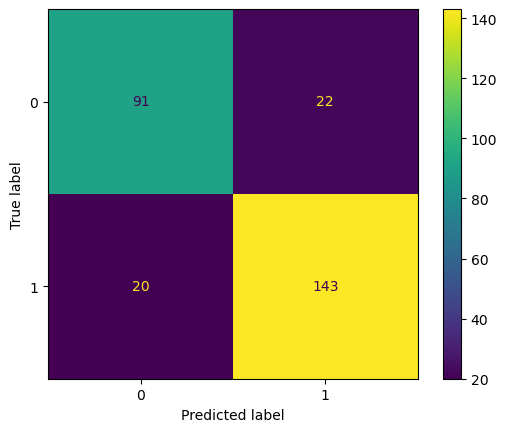

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
gnb.score(X_test,y_test)
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

In [16]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

The accuracy for Naive Bytes= 0.8478260869565217
Recall: 0.8773006134969326


### The Logistic Regression

/opt/homebrew/Caskroom/miniforge/base/envs/ECG/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


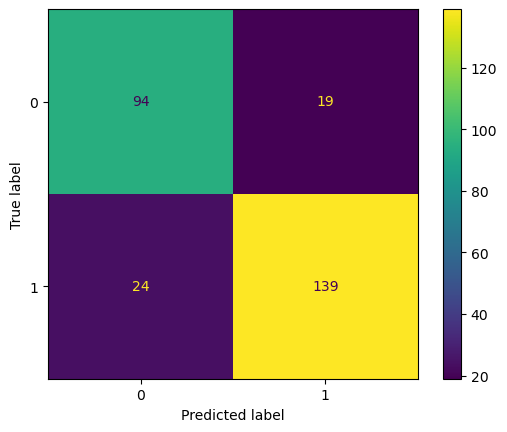

In [17]:
logisticRegressionmodel=LogisticRegression()
logisticRegressionmodel.fit(X_train,y_train)
y_pred=logisticRegressionmodel.predict(X_test)
plot_confusion_matrix(logisticRegressionmodel, X_test, y_test)
plt.show()

In [18]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))
print("Root Mean Squared Error: "+str(mean_squared_error(y_test, y_pred)))
print("r2 Score: "+str(r2_score(y_test, y_pred)))

The accuracy for Naive Bytes= 0.8442028985507246
Recall: 0.852760736196319
Root Mean Squared Error: 0.15579710144927536
r2 Score: 0.3556653455670773


### KNN algorithm

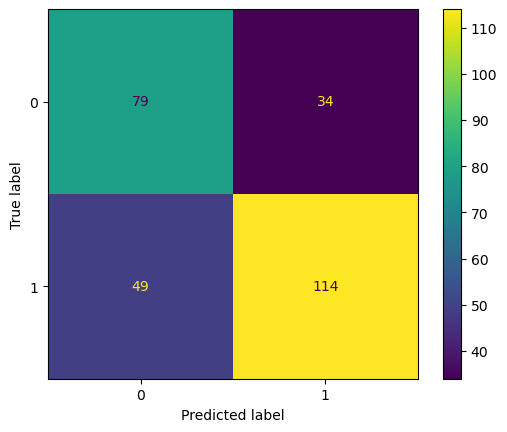

In [19]:
score=[]
for i in range(1,50):
    knnalgo=KNeighborsClassifier(n_neighbors=i)
    knnalgo.fit(X_train,y_train)
    y_pred=knnalgo.predict(X_test)
    temp=mean_squared_error(y_test,y_pred)
    score.append(temp)
    
knnalgo=KNeighborsClassifier(n_neighbors=26)
knnalgo.fit(X_train, y_train)
y_pred = knnalgo.predict(X_test)
temp=mean_squared_error(y_test, y_pred)
plot_confusion_matrix(knnalgo, X_test, y_test)
plt.show()

In [20]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

The accuracy for Naive Bytes= 0.6992753623188406
Recall: 0.6993865030674846


### RandomForestRegressor

In [21]:
regressor = RandomForestRegressor(n_estimators = 200,max_depth=12,random_state = 100)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_test=list(y_test)
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i])
y_pred=list(y_pred)
print("The accuracy for Random Forest Regressor= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

The accuracy for Random Forest Regressor= 0.8695652173913043
Recall: 0.901840490797546


### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred=linear_regression.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i])
y_pred=list(y_pred)

print("Accuracy: "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

Accuracy: 83.69565217391305
Recall: 84.04907975460122


### RNN

In [23]:
model=Sequential(name='RNN_Model')
model.add()
